Date source:
- KDD Cup 1999 Data (https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)
- NSL-KDD dataset, a new version of the KDD data set (http://www.unb.ca/cic/research/datasets/nsl.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [3]:
df = pd.read_csv('NSL-KDD/KDDTrain+.arff', sep=",", header=None, names=columns, skiprows=44)

In [4]:
df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [5]:
df.shape

(125973, 42)

In [6]:
test_df = pd.read_csv('NSL-KDD/KDDTest+.arff', sep=",", header=None, names=columns, skiprows=44)
test_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,anomaly


In [7]:
test_df.shape

(22544, 42)

In [8]:
test_df.label.value_counts()

anomaly    12833
normal      9711
Name: label, dtype: int64

In [9]:
df.label.value_counts()

normal     67343
anomaly    58630
Name: label, dtype: int64

In [10]:
import seaborn as sns

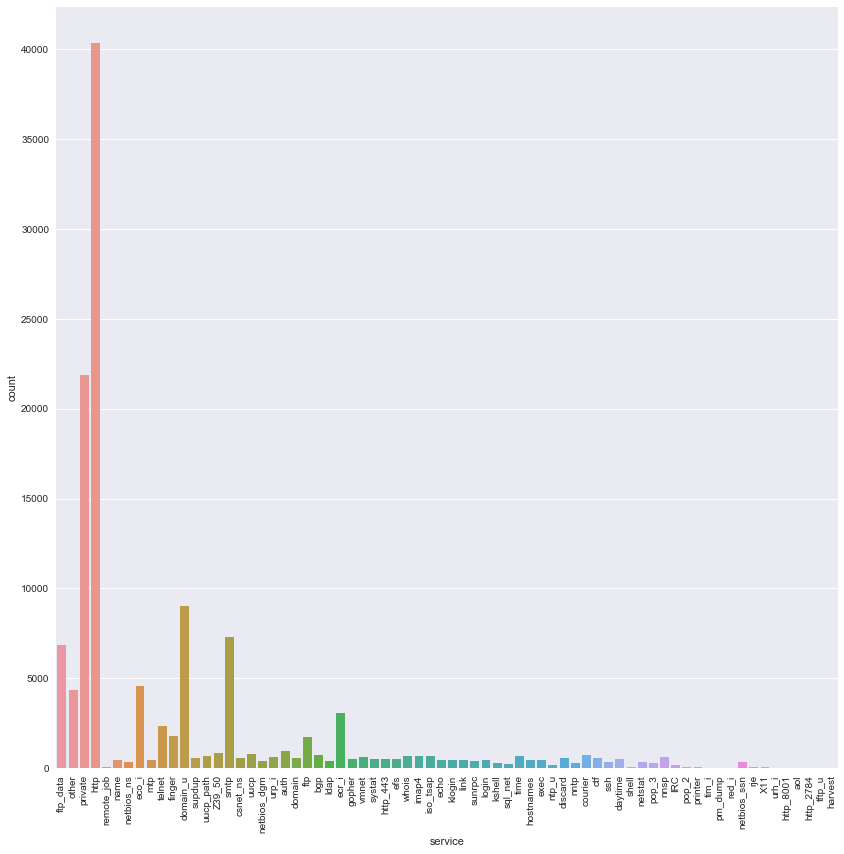

In [11]:
plt.figure(figsize=(14, 14))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.countplot(x='service', data=df)

In [12]:
temp = df.drop(['protocol_type', 'service', 'flag', 'label'], axis=1)
temp.shape

(125973, 38)

In [13]:
temp.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

/home/yuqing/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/yuqing/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


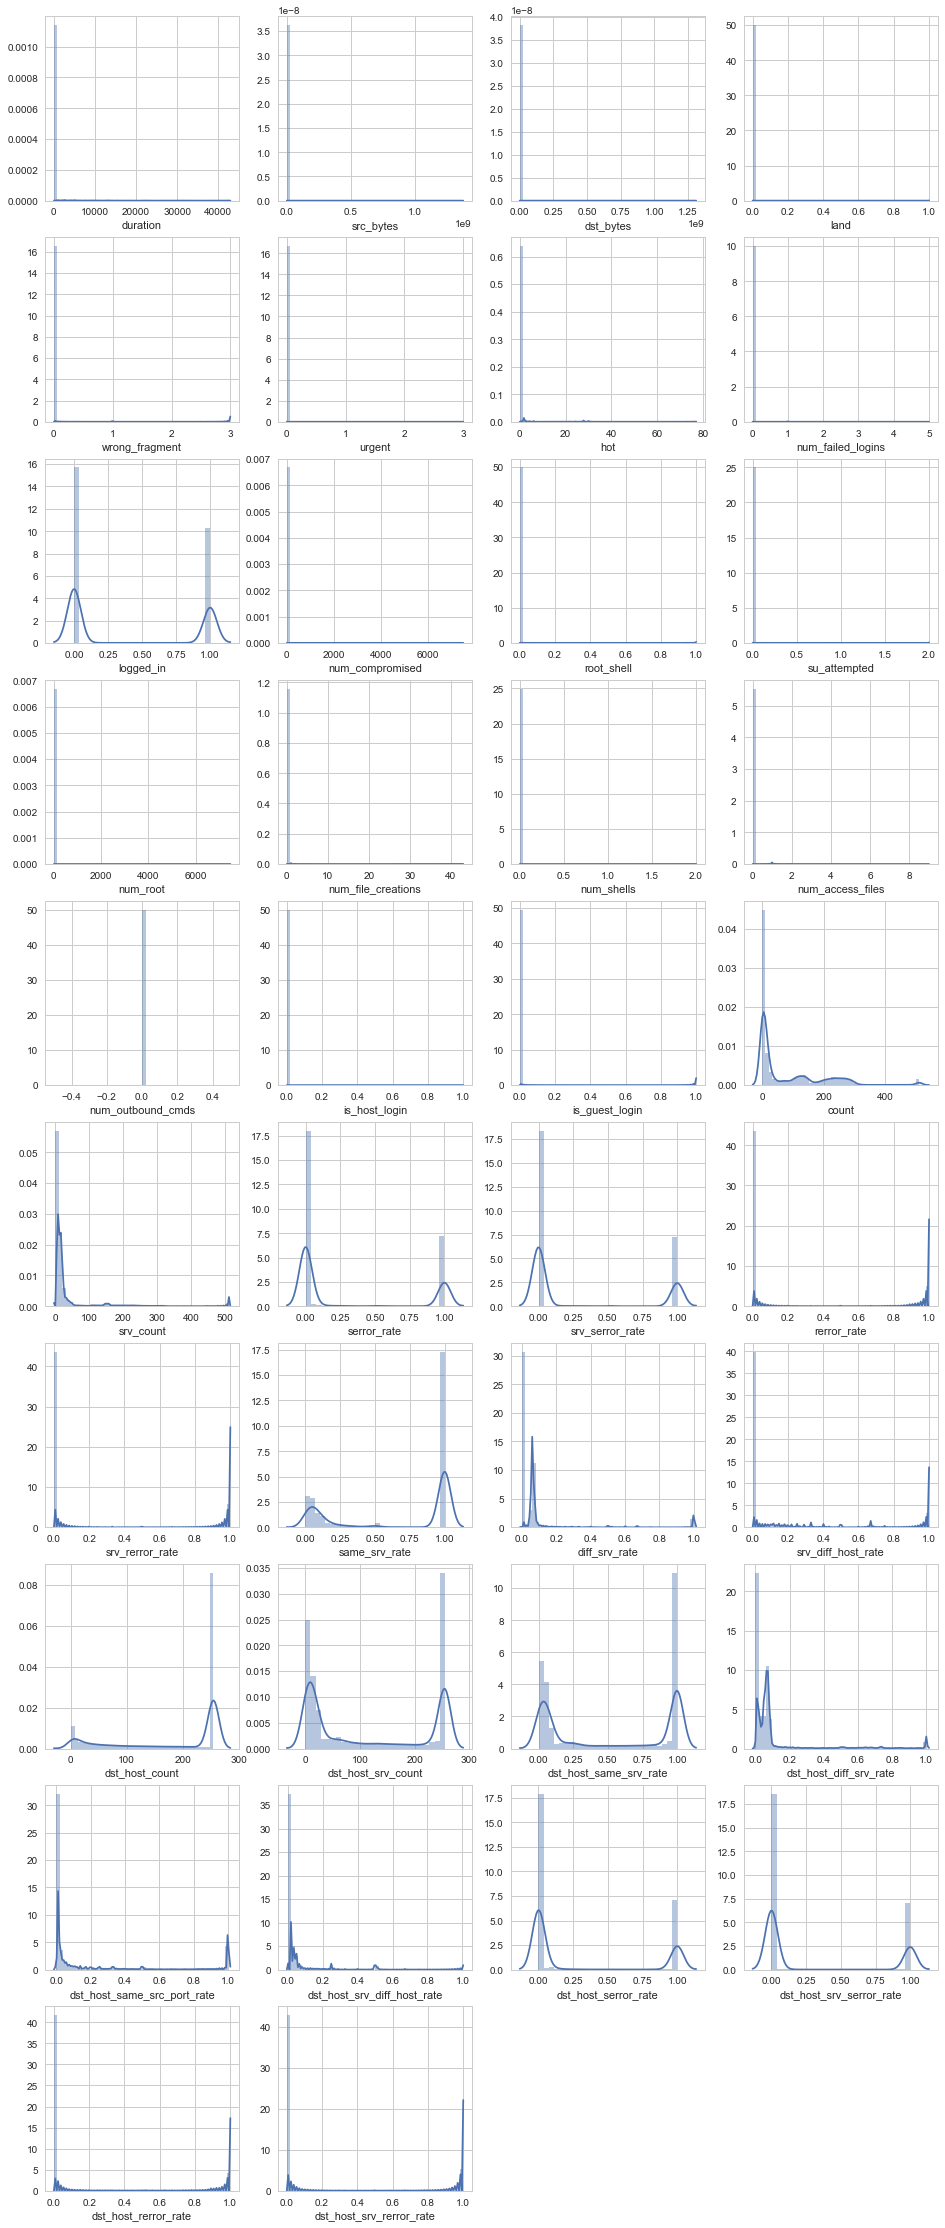

In [14]:
fig = plt.figure(figsize=(16, 40))
sns.set_style('whitegrid')

for k, v in enumerate(list(temp.columns)):
    ax = fig.add_subplot(10, 4, 1+k)
    sns.distplot(temp[v], ax=ax)

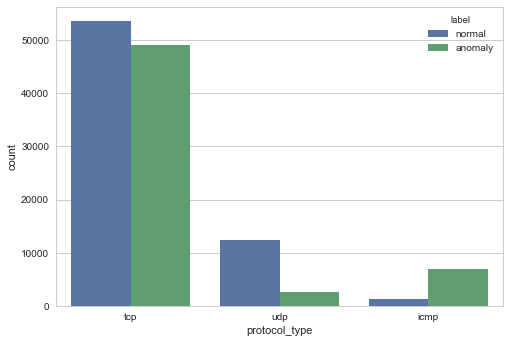

In [15]:
sns.countplot(x='protocol_type', data=df, hue='label')

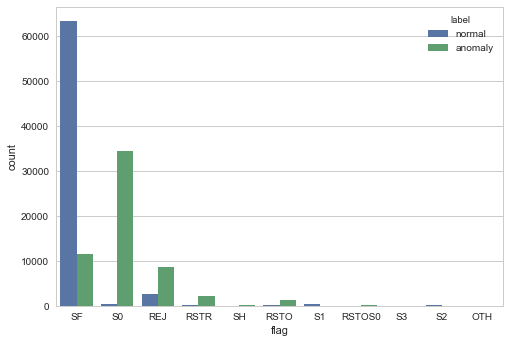

In [16]:
sns.countplot(x='flag', data=df, hue='label')

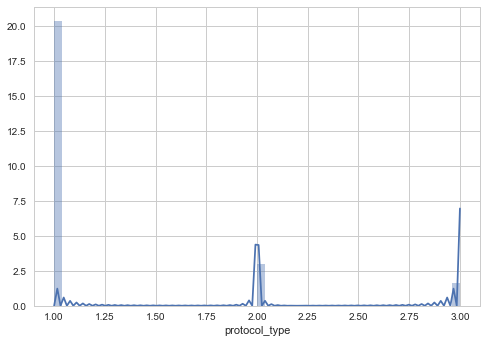

In [17]:
sns.distplot(df.protocol_type.map({'tcp':1, 'udp':2, 'icmp':3}))

In [18]:
from sklearn import preprocessing

In [19]:
cat_temp = df[['protocol_type', 'service', 'flag']].apply(preprocessing.LabelEncoder().fit_transform)

In [20]:
cat_temp.head(10)

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9
5,1,49,1
6,1,49,5
7,1,49,5
8,1,51,5
9,1,49,5


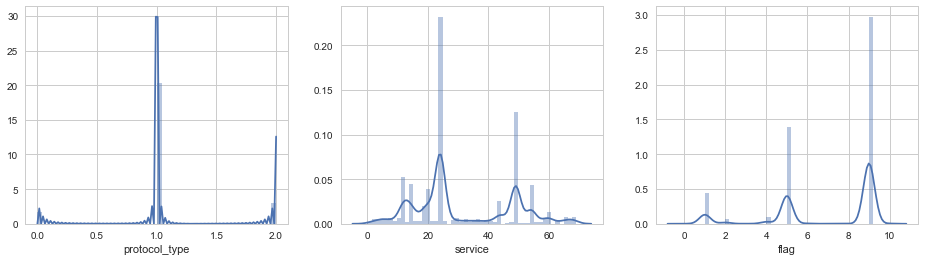

In [21]:
fig = plt.figure(figsize=(16, 4))
sns.set_style('whitegrid')

for k, v in enumerate(list(cat_temp.columns)):
    ax = fig.add_subplot(1, 3, 1+k)
    sns.distplot(cat_temp[v], ax=ax)

In [24]:
pd.set_option('display.max_columns', 0)
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
clf = GradientBoostingClassifier(random_state=1)

In [32]:
y = df.label.map({'normal':0, 'anomaly':1})
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [33]:
clf.fit(temp, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [37]:
x_test = test_df.drop(['protocol_type', 'service', 'flag', 'label'], axis=1)

In [38]:
y_test = test_df.label.map({'normal':0, 'anomaly':1})

In [39]:
pred = clf.predict(x_test)

In [40]:
pred

array([1, 1, 0, ..., 1, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score, fbeta_score

In [42]:
accuracy_score(y_test, pred)

0.78996628814762238

## Data scaling

In [43]:
skewed_features = ['duration', 'src_bytes', 'dst_bytes', 'num_compromised', 'num_root']

temp_logged = temp
temp_logged[skewed_features] = temp_logged[skewed_features].apply(lambda x: np.log(x + 1))

In [45]:
temp_logged.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.321650,3.229669,3.084400,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.011342,0.001342,0.001103,0.009442,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,1.451379,2.982191,3.548927,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,0.161887,0.036603,0.045154,0.170878,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.806662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.624018,6.248043,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,10.666837,21.045323,20.993245,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,8.919988,1.000000,2.000000,8.918516,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp_logged_scaled = scaler.fit_transform(temp_logged)

In [51]:
from IPython.display import display

type(temp_logged_scaled)

numpy.ndarray

In [52]:
temp_logged_scaled

array([[ 0.        ,  0.29452998,  0.        , ...,  0.        ,
         0.05      ,  0.        ],
       [ 0.        ,  0.23712787,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.36638322,  0.28357899, ...,  0.        ,
         0.01      ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.2387172 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
clf_scaled = GradientBoostingClassifier(random_state=1)
clf_scaled.fit(temp_logged_scaled, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [54]:
x_test_logged = x_test
x_test_logged[skewed_features] = x_test_logged[skewed_features].apply(lambda x: np.log(x + 1))

In [55]:
x_test_logged_scaled = scaler.transform(x_test_logged)

In [56]:
x_test_logged_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.10299326,  0.45005121,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.51824854,  0.42993907, ...,  0.        ,
         0.07      ,  0.07      ],
       [ 0.        ,  0.17871905,  0.1791624 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.44      ,  1.        ]])

In [57]:
pred_scaled = clf_scaled.predict(x_test_logged_scaled)

In [58]:
accuracy_score(y_test, pred_scaled)

0.78996628814762238

In [59]:
pred_scaled

array([1, 1, 0, ..., 1, 0, 1])

## Modeling MLP

In [60]:
temp_logged_scaled.shape

(125973, 38)

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define the model
model = Sequential()
 
model.add(Dense(200, input_dim=38, use_bias=True, activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(40, use_bias=True, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, use_bias=True, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 200)               7800      
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 201       
Total params: 8,001.0
Trainable params: 8,001.0
Non-trainable params: 0.0
_________________________________________________________________


In [104]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# Fit the model
model.fit(temp_logged_scaled, y, epochs=10, verbose=1)

Epoch 1/10
125973/125973 [==============================] - 5s - loss: 0.0779 - acc: 0.9728     
Epoch 2/10
125973/125973 [==============================] - 5s - loss: 0.0395 - acc: 0.9864     
Epoch 3/10
125973/125973 [==============================] - 5s - loss: 0.0304 - acc: 0.9896     
Epoch 4/10
125973/125973 [==============================] - 5s - loss: 0.0257 - acc: 0.9914     
Epoch 5/10
125973/125973 [==============================] - 5s - loss: 0.0227 - acc: 0.9922     
Epoch 6/10
125973/125973 [==============================] - 5s - loss: 0.0208 - acc: 0.9925     
Epoch 7/10
125973/125973 [==============================] - 5s - loss: 0.0191 - acc: 0.9936     
Epoch 8/10
125973/125973 [==============================] - 5s - loss: 0.0181 - acc: 0.9940     
Epoch 9/10
125973/125973 [==============================] - 5s - loss: 0.0172 - acc: 0.9944     
Epoch 10/10
125973/125973 [==============================] - 5s - loss: 0.0164 - acc: 0.9944     


In [106]:
pred_mlp = model.predict_classes(x_test_logged_scaled)

19680/22544 [=========================>....] - ETA: 0s

In [107]:
accuracy_score(y_test, pred_mlp)

0.81081440738112132

In [109]:
# evaluate and print test accuracy
score = model.evaluate(x_test_logged_scaled, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.810814407381


### Train and Validation set

In [98]:
y.shape

(125973,)

In [99]:
temp_logged_scaled.shape

(125973, 38)

In [100]:
# break training set into training and validation sets
(x_train, x_valid) = temp_logged_scaled[25000:], temp_logged_scaled[:25000]
(y_train, y_valid) = y[25000:], y[:25000]

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test_logged_scaled.shape[0], 'test samples')

100973 train samples
25000 validation samples
22544 test samples


In [149]:
# define the model
model = Sequential()
 
model.add(Dense(256, input_dim=38, use_bias=True, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, use_bias=True, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, use_bias=True, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               9984      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 26,497.0
Trainable params: 26,497.0
Non-trainable params: 0.0
_________________________________________________________________


In [150]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 100973 samples, validate on 25000 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 0.03955, saving model to MLP.weights.best.hdf5
5s - loss: 0.0780 - acc: 0.9724 - val_loss: 0.0395 - val_acc: 0.9865
Epoch 2/30
Epoch 00001: val_loss improved from 0.03955 to 0.02684, saving model to MLP.weights.best.hdf5
5s - loss: 0.0395 - acc: 0.9865 - val_loss: 0.0268 - val_acc: 0.9906
Epoch 3/30
Epoch 00002: val_loss improved from 0.02684 to 0.02264, saving model to MLP.weights.best.hdf5
5s - loss: 0.0302 - acc: 0.9895 - val_loss: 0.0226 - val_acc: 0.9918
Epoch 4/30
Epoch 00003: val_loss improved from 0.02264 to 0.01985, saving model to MLP.weights.best.hdf5
5s - loss: 0.0268 - acc: 0.9905 - val_loss: 0.0198 - val_acc: 0.9930
Epoch 5/30
Epoch 00004: val_loss improved from 0.01985 to 0.01913, saving model to MLP.weights.best.hdf5
5s - loss: 0.0247 - acc: 0.9912 - val_loss: 0.0191 - val_acc: 0.9928
Epoch 6/30
Epoch 00005: val_loss did not improve
5s - loss: 0.0234 - acc: 0.9917 - 

In [152]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

In [153]:
# evaluate and print test accuracy
score = model.evaluate(x_test_logged_scaled, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.810237757275


In [154]:
pred_mlp = model.predict_classes(x_test_logged_scaled)

21600/22544 [===========================>..] - ETA: 0s

In [155]:
fbeta_score(y_test, pred_mlp, beta = 2)

0.73121516349382254

In [156]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_mlp))

print('\n' + classification_report(y_test, pred_mlp))

[[9424  287]
 [3991 8842]]

             precision    recall  f1-score   support

          0       0.70      0.97      0.82      9711
          1       0.97      0.69      0.81     12833

avg / total       0.85      0.81      0.81     22544



## GBC

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [200, 300, 400],
              'max_depth': [3, 4, 5]}

# TODO: Make an fbeta_score scoring object using make_scorer()
# Here we weigh recall higher than precision (by placing more emphasis on false negatives)
scorer = make_scorer(fbeta_score, beta=2)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(temp_logged_scaled, y)

In [116]:
# Get the estimator
best_clf = grid_fit.best_estimator_

In [117]:
best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [119]:
best_predictions = best_clf.predict(x_test_logged_scaled)

In [121]:
accuracy_score(y_test, best_predictions)

0.77515081618168913

In [124]:
fbeta_score(y_test, best_predictions, beta = 2)

0.67242189335212588

## New Test data

In [160]:
test = pd.read_csv('NSL-KDD/KDDTest+.txt', sep=",", header=None, skiprows=44)

In [161]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,mtp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,266,8,0.0,0.00,1.0,1.00,0.03,0.06,0.00,255,8,0.03,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,20
1,0,tcp,http,SF,234,3236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,21,0.0,0.00,0.0,0.00,1.00,0.00,0.10,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,normal,21
2,0,tcp,systat,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,281,6,1.0,1.00,0.0,0.00,0.02,0.06,0.00,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.00,0.00,neptune,19
3,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,4,24,0.0,0.00,0.0,0.00,1.00,0.00,0.08,255,250,0.98,0.01,0.00,0.00,0.0,0.0,0.06,0.06,back,12
4,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,1.0,0.33,0.0,0.67,1.00,0.00,0.92,91,86,0.34,0.03,0.01,0.03,1.0,1.0,0.00,0.00,mscan,18


In [162]:
test.shape

(22500, 43)

In [169]:
test.loc[:, 41].unique()

array(['neptune', 'normal', 'back', 'mscan', 'warezmaster',
       'snmpgetattack', 'processtable', 'guess_passwd', 'satan', 'pod',
       'httptunnel', 'nmap', 'ps', 'smurf', 'snmpguess', 'apache2',
       'ipsweep', 'mailbomb', 'saint', 'portsweep', 'multihop', 'named',
       'sendmail', 'buffer_overflow', 'loadmodule', 'xterm', 'worm',
       'teardrop', 'rootkit', 'xlock', 'perl', 'land', 'xsnoop',
       'sqlattack', 'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [170]:
test.loc[:, 41].value_counts()

normal             9687
neptune            4648
guess_passwd       1229
mscan               992
warezmaster         944
apache2             736
satan               734
processtable        685
smurf               664
back                359
snmpguess           331
saint               318
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      19
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
sqlattack             2
udpstorm              2
phf                   2
perl                  2
imap                  1
Name: 41, dtype: int64

In [182]:
df.num_outbound_cmds.describe()

count    125973.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [178]:
corrected = pd.read_csv('corrected', sep=",", header=None, names=columns)
corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [179]:
corrected.shape

(311029, 42)

In [181]:
corrected.num_outbound_cmds.describe()

count    311029.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [183]:
corrected.label.value_counts()

smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
sendmail.               17
named.                  17
ps.                     16
rootkit.                13
xterm.                  13
teardrop.               12
land.                    9
xlock.                   9
xsnoop.                  4
ftp_write.               3
sqlattack.               2
udpstorm.                2
loadmodule.              2
perl.                    2
worm.                    2
phf.                     2
i

In [184]:
corrected.label.nunique()

38

In [185]:
corrected.label = corrected.label.apply(lambda l: l.strip('.'))

In [186]:
corrected.label.value_counts()

smurf              164091
normal              60593
neptune             58001
snmpgetattack        7741
mailbomb             5000
guess_passwd         4367
snmpguess            2406
satan                1633
warezmaster          1602
back                 1098
mscan                1053
apache2               794
processtable          759
saint                 736
portsweep             354
ipsweep               306
httptunnel            158
pod                    87
nmap                   84
buffer_overflow        22
multihop               18
named                  17
sendmail               17
ps                     16
rootkit                13
xterm                  13
teardrop               12
xlock                   9
land                    9
xsnoop                  4
ftp_write               3
sqlattack               2
worm                    2
phf                     2
loadmodule              2
udpstorm                2
perl                    2
imap                    1
Name: label,

In [259]:
# https://www.researchgate.net/publication/267558979_Efficient_Classifier_for_R2L_and_U2R_Attacks
# https://ll.mit.edu/ideval/docs/attackDB.html

attack_types = {'dos': ['smurf', 'neptune', 'mailbomb', 'back', 'apache2', 'processtable', 'pod', 
                        'teardrop', 'land', 'udpstorm'],
                'probe': ['satan', 'mscan', 'portsweep', 'saint', 'ipsweep', 'nmap'],
                'r2l': ['snmpgetattack', 'guess_passwd', 'snmpguess', 'warezmaster', 'httptunnel', 
                        'multihop', 'named', 'sendmail', 'xlock', 'xsnoop', 'ftp_write', 'worm', 
                        'phf', 'imap', 'warezclient', 'spy'],
                'u2r': ['buffer_overflow', 'ps', 'rootkit', 'xterm', 'sqlattack', 'loadmodule', 'perl']}

In [196]:
def to_category(label):
    if label == 'normal':
        return 'normal'
    for item in attack_types.items():
        if label in item[1]:
            return item[0]

In [636]:
corrected.label.apply(to_category).value_counts()

dos       229853
normal     60593
r2l        16347
probe       4166
u2r           70
Name: label, dtype: int64

## Back to NSL data with full attack types (.txt)

In [206]:
new_columns = columns + ['difficulty_level']

In [221]:
train = pd.read_csv('NSL-KDD/KDDTrain+.txt', sep=",", header=None, names=new_columns)
test = pd.read_csv('NSL-KDD/KDDTest+.txt', sep=",", header=None, names=new_columns)

In [222]:
print(train.shape, test.shape)

(125973, 43) (22544, 43)


In [223]:
train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15


In [224]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [408]:
def preprocess(df):
    # take log on skewed features
    skewed_features = ['duration', 'src_bytes', 'dst_bytes', 
                       'num_compromised', 'num_root', 'count', 
                       'srv_count', 'dst_host_count', 'dst_host_srv_count']
    
    df[skewed_features] = df[skewed_features].apply(lambda x: np.log(x + 1))
    # exclude category features for now and unuseful features
    X = df.drop(['protocol_type', 'service', 'flag', 'num_outbound_cmds', 'label', 'difficulty_level'], axis=1)
    # map label/attack type to category to int
    y = df.label.apply(to_category)
    y = y.map({'normal':0, 'probe':1, 'dos':2, 'u2r':3, 'r2l':4}).astype('int')
    return X, y

In [409]:
X, y = preprocess(train)

In [410]:
X.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.029830,0.257597,0.202935,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.002927,0.001342,0.001103,0.001692,0.012669,0.000413,0.004096,0.000008,0.009423,0.447503,0.425244,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,0.519930,0.488633,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,0.103493,0.208634,0.219943,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,0.029198,0.036603,0.045154,0.023906,0.483935,0.022181,0.099370,0.002817,0.096612,0.093547,0.076527,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,0.050734,0.069378,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365497,0.365497,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.523474,0.461966,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.411874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475232,0.452118,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.543148,0.517941,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.434583,0.440092,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533860,0.484061,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,0.543148,0.543148,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,0.464651,0.489144,0.489066,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,0.457035,1.000000,2.000000,0.457027,43.000000,2.000000,9.000000,1.000000,1.000000,0.552727,0.552727,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.543148,0.543148,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [411]:
y.value_counts()

0    67343
2    45927
1    11656
4      995
3       52
Name: label, dtype: int64

In [412]:
y.isnull().sum()

0

In [413]:
new_skewed_features = ['duration', 'src_bytes', 'dst_bytes', 
                       'num_compromised', 'num_root', 'count', 
                       'srv_count', 'dst_host_count', 'dst_host_srv_count']

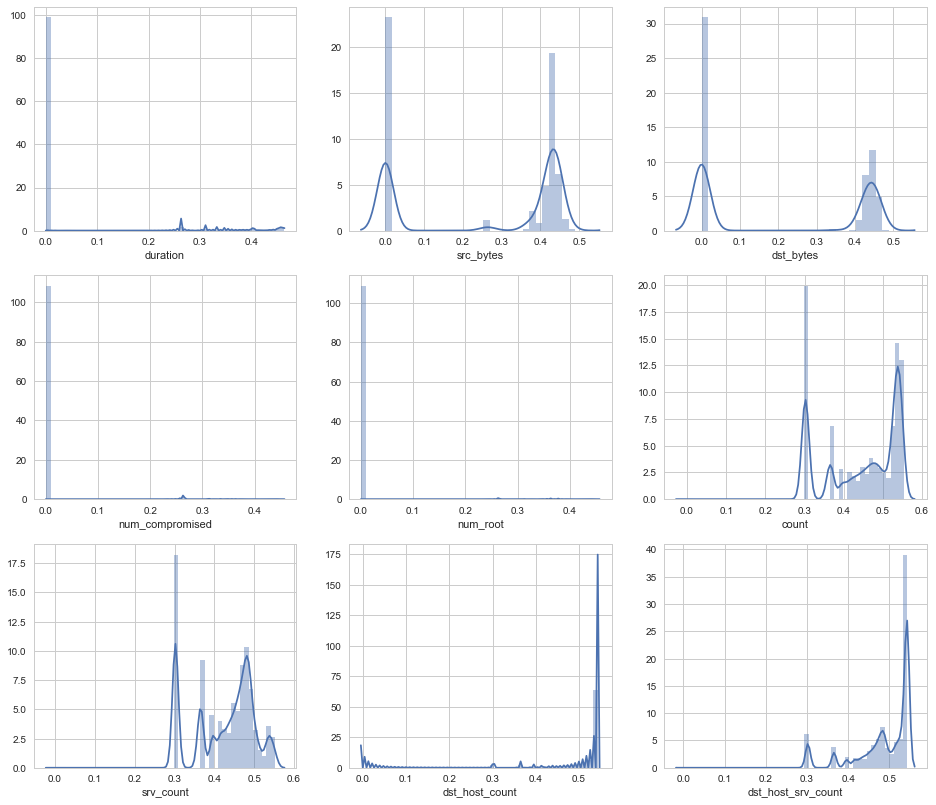

In [415]:
fig = plt.figure(figsize=(16, 14))

for k, v in enumerate(new_skewed_features):
    ax = fig.add_subplot(3, 3, 1+k)
    sns.distplot(X[v], ax=ax)

In [416]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [417]:
from keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

In [418]:
print(X.shape, y.shape, num_classes)

(125973, 37) (125973, 5) 5


In [419]:
test_X, test_y = preprocess(test)

In [420]:
test_X_scaled = scaler.transform(test_X)

In [421]:
test_y_cat = to_categorical(test_y, num_classes)

In [422]:
print(type(test_X_scaled), type(test_y_cat))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [423]:
# break training set into training and validation sets
(x_train, x_valid) = X_scaled[:110000], X_scaled[110000:]
(y_train, y_valid) = y[:110000], y[110000:]

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(test_X_scaled.shape[0], 'test samples')

110000 train samples
15973 validation samples
22544 test samples


In [439]:
# define the model
model = Sequential()

model.add(Dense(512, input_dim=37, use_bias=True, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(128, use_bias=True, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(64, use_bias=True, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               19456     
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 5)                 325       
Total params: 52,613.0
Trainable params: 52,613.0
Non-trainable params: 0.0
_________________________________________________________________


In [440]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [441]:
# train the model
checkpointer = ModelCheckpoint(filepath='MLP_MC.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 110000 samples, validate on 15973 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.03958, saving model to MLP_MC.weights.best.hdf5
11s - loss: 0.0762 - acc: 0.9761 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 2/20
Epoch 00001: val_loss improved from 0.03958 to 0.03314, saving model to MLP_MC.weights.best.hdf5
10s - loss: 0.0419 - acc: 0.9857 - val_loss: 0.0331 - val_acc: 0.9891
Epoch 3/20
Epoch 00002: val_loss improved from 0.03314 to 0.02909, saving model to MLP_MC.weights.best.hdf5
10s - loss: 0.0363 - acc: 0.9879 - val_loss: 0.0291 - val_acc: 0.9914
Epoch 4/20
Epoch 00003: val_loss improved from 0.02909 to 0.02789, saving model to MLP_MC.weights.best.hdf5
10s - loss: 0.0332 - acc: 0.9889 - val_loss: 0.0279 - val_acc: 0.9897
Epoch 5/20
Epoch 00004: val_loss improved from 0.02789 to 0.02782, saving model to MLP_MC.weights.best.hdf5
10s - loss: 0.0314 - acc: 0.9896 - val_loss: 0.0278 - val_acc: 0.9909
Epoch 6/20
Epoch 00005: val_loss improved from 0.02782 to 0.024

In [442]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP_MC.weights.best.hdf5')

In [443]:
# evaluate and print test accuracy
score = model.evaluate(test_X_scaled, test_y_cat, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.71336053939


In [444]:
pred_mc = model.predict_classes(test_X_scaled)

22240/22544 [============================>.] - ETA: 0s

In [445]:
print(confusion_matrix(test_y, pred_mc))

[[8819  189  702    1    0]
 [ 967 1225  229    0    0]
 [1410   11 6037    0    0]
 [  67    0    0    0    0]
 [2864   11   11    0    1]]


In [446]:
from pandas_ml import ConfusionMatrix

In [447]:
cm = ConfusionMatrix(test_y, pred_mc)
cm

Predicted      0     1     2  3  4  __all__
Actual                                     
0           8819   189   702  1  0     9711
1            967  1225   229  0  0     2421
2           1410    11  6037  0  0     7458
3             67     0     0  0  0       67
4           2864    11    11  0  1     2887
__all__    14127  1436  6979  1  1    22544

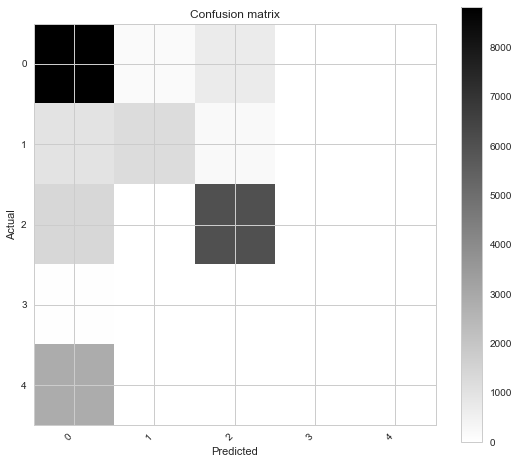

In [448]:
cm.plot()

In [449]:
cm.classification_report

,precision,recall,F1_score,support
Classes,,,,
0,0.624266,0.908145,0.739911,9711
1,0.853064,0.505989,0.635209,2421
2,0.865024,0.809466,0.836323,7458
3,0,0,0,67
4,1,0.00034638,0.000692521,2887
__avg / total__,0.774745,0.713361,0.663698,22544


## Add category features

In [580]:
def preprocess_cat(df):
    
    # take log on skewed features
    skewed_features = ['duration', 'src_bytes', 'dst_bytes', 
                       'num_compromised', 'num_root', 'count', 
                       'srv_count', 'dst_host_count', 'dst_host_srv_count']    
    df[skewed_features] = df[skewed_features].apply(lambda x: np.log(x + 1))
    
    # exclude unuseful features
    X = df.drop(['num_outbound_cmds', 'label', 'difficulty_level'], axis=1)
    
    # get dummy for category features
    X = pd.get_dummies(X, columns=['protocol_type', 'flag', 'service'])
        
    # map label/attack type to category to int
    y = df.label.apply(to_category)
    y = y.map({'normal':0, 'probe':1, 'dos':2, 'u2r':3, 'r2l':4}).astype('int')
    
    return X, y

In [581]:
X, y = preprocess_cat(train)

In [582]:
X.shape

(125973, 121)

In [583]:
X.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,...,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.014205,0.116010,0.089622,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.001589,0.001342,0.001103,0.000861,0.012669,0.000413,0.004096,0.000008,0.009423,0.193856,0.189933,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,0.208826,0.202782,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.065816,0.815167,0.119018,0.000365,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,...,0.054456,0.004112,0.000016,0.003652,0.320211,0.000008,0.004207,0.000016,0.005136,0.005454,0.003437,0.002374,0.003255,0.003771,0.003405,0.003485,0.003580,0.003215,0.002755,0.002874,0.002858,0.005001,0.002350,0.001334,0.034603,0.00004,0.000619,0.002096,0.000548,0.173474,0.000064,0.000619,0.000683,0.000516,0.058052,0.001945,0.002469,0.003024,0.004318,0.003787,0.018679,0.000024,0.000064,0.005192,0.000079,0.004779,0.006192,0.005469,0.004898,0.005501
std,0.048593,0.093406,0.097041,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,0.015700,0.036603,0.045154,0.012019,0.483935,0.022181,0.099370,0.002817,0.096612,0.020278,0.017174,0.446456,0.447022,0.320436,0.323647,0.4

In [584]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [585]:
# one-hot encode the labels
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes)

In [586]:
print(X_scaled.shape, y_cat.shape, num_classes)

(125973, 121) (125973, 5) 5


In [587]:
test_X, test_y = preprocess_cat(test)

In [588]:
test_X.shape

(22544, 115)

In [589]:
test_X.T.reindex(X.columns).T.fillna(0).shape

(22544, 121)

In [590]:
test_X = test_X.T.reindex(X.columns).T.fillna(0)

In [591]:
test_X_scaled = scaler.transform(test_X)

In [592]:
test_y_cat = to_categorical(test_y, num_classes)

In [597]:
# break training set into training and validation sets
(x_train, x_valid) = X_scaled[20000:], X_scaled[:20000]
(y_train, y_valid) = y_cat[20000:], y_cat[:20000]

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(test_X_scaled.shape[0], 'test samples')

105973 train samples
20000 validation samples
22544 test samples


In [598]:
# define the model
model = Sequential()

model.add(Dense(1280, input_dim=121, use_bias=True, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(512, use_bias=True, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(64, use_bias=True, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1280)              156160    
_________________________________________________________________
dropout_51 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 5)                 6405      
Total params: 162,565.0
Trainable params: 162,565.0
Non-trainable params: 0.0
_________________________________________________________________


In [599]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [600]:
# train the model
checkpointer = ModelCheckpoint(filepath='MLP_MC_CAT.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 105973 samples, validate on 20000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.03286, saving model to MLP_MC_CAT.weights.best.hdf5
19s - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0329 - val_acc: 0.9909
Epoch 2/20
Epoch 00001: val_loss improved from 0.03286 to 0.02733, saving model to MLP_MC_CAT.weights.best.hdf5
18s - loss: 0.0307 - acc: 0.9899 - val_loss: 0.0273 - val_acc: 0.9906
Epoch 3/20
Epoch 00002: val_loss improved from 0.02733 to 0.02687, saving model to MLP_MC_CAT.weights.best.hdf5
18s - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0269 - val_acc: 0.9910
Epoch 4/20
Epoch 00003: val_loss improved from 0.02687 to 0.02304, saving model to MLP_MC_CAT.weights.best.hdf5
18s - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0230 - val_acc: 0.9941
Epoch 5/20
Epoch 00004: val_loss improved from 0.02304 to 0.02141, saving model to MLP_MC_CAT.weights.best.hdf5
18s - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0214 - val_acc: 0.9938
Epoch 6/20
Epoch 00005: val_loss did not im

In [601]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP_MC_CAT.weights.best.hdf5')

In [602]:
# evaluate and print test accuracy
score = model.evaluate(test_X_scaled, test_y_cat, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.766855926189


In [603]:
pred_mc_cat = model.predict_classes(test_X_scaled)

22048/22544 [============================>.] - ETA: 0s

In [604]:
cm = ConfusionMatrix(test_y, pred_mc_cat)
cm

Predicted      0     1     2  3    4  __all__
Actual                                       
0           8880   174   657  0    0     9711
1            289  1581   550  0    1     2421
2            798    51  6592  0   17     7458
3             61     0     0  2    4       67
4           2415    14   224  1  233     2887
__all__    12443  1820  8023  3  255    22544

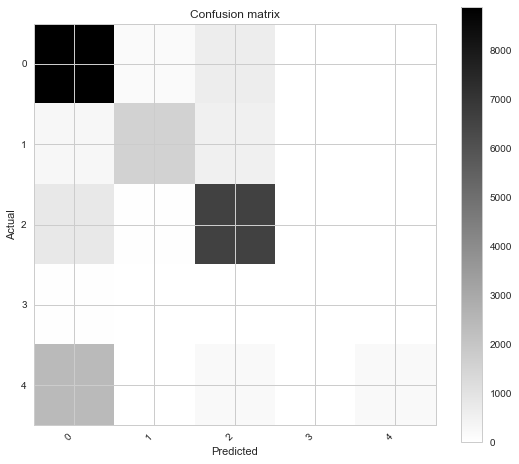

In [605]:
cm.plot()

In [606]:
cm.classification_report

,precision,recall,F1_score,support
Classes,,,,
0,0.713654,0.914427,0.801661,9711
1,0.868681,0.653036,0.745579,2421
2,0.821638,0.883883,0.851625,7458
3,0.666667,0.0298507,0.0571429,67
4,0.913725,0.0807066,0.148313,2887
__avg / total__,0.791507,0.766856,0.726286,22544


In [649]:
pd.crosstab(test_y, pred_mc_cat, rownames=['True'], colnames=['Predicted'], normalize='index')

Predicted,0,1,2,3,4
True,,,,,
0,0.914427,0.017918,0.067655,0.000000,0.000000
1,0.119372,0.653036,0.227179,0.000000,0.000413
2,0.106999,0.006838,0.883883,0.000000,0.002279
3,0.910448,0.000000,0.000000,0.029851,0.059701
4,0.836508,0.004849,0.077589,0.000346,0.080707


In [650]:
pd.crosstab(test_y, pred_mc_cat, rownames=['True'], colnames=['Predicted'], normalize='columns')

Predicted,0,1,2,3,4
True,,,,,
0,0.713654,0.095604,0.081890,0.000000,0.000000
1,0.023226,0.868681,0.068553,0.000000,0.003922
2,0.064132,0.028022,0.821638,0.000000,0.066667
3,0.004902,0.000000,0.000000,0.666667,0.015686
4,0.194085,0.007692,0.027920,0.333333,0.913725


In [653]:
test.service.unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4', 'domain_u',
       'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns', 'finger', 'uucp',
       'whois', 'netbios_ns', 'link', 'Z39_50', 'sunrpc', 'auth',
       'netbios_dgm', 'uucp_path', 'vmnet', 'domain', 'name', 'pop_2',
       'http_443', 'urp_i', 'login', 'gopher', 'exec', 'time',
       'remote_job', 'ssh', 'kshell', 'sql_net', 'shell', 'hostnames',
       'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf', 'nntp',
       'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje', 'printer',
       'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'], dtype=object)

## GBT again

In [610]:
clf = GradientBoostingClassifier(random_state=1, n_estimators=400, max_depth=5, learning_rate=0.2)

In [611]:
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [612]:
pred_gbt = clf.predict(test_X)

In [613]:
accuracy_score(test_y, pred_gbt)

0.49897977288857348

In [618]:
clf_scaled = GradientBoostingClassifier(random_state=1, n_estimators=400, max_depth=5, learning_rate=0.2)
clf_scaled.fit(X_scaled, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [619]:
pred_gbt_scaled = clf_scaled.predict(test_X_scaled)

In [620]:
accuracy_score(test_y, pred_gbt_scaled)

0.49897977288857348

In [621]:
ConfusionMatrix(test_y, pred_gbt_scaled)

Predicted     0     1      2   3    4  __all__
Actual                                        
0          3137    68   6459   0   47     9711
1          1144  1108    169   0    0     2421
2          1168    40   6250   0    0     7458
3            45     2      1  11    8       67
4          2131    10      1   2  743     2887
__all__    7625  1228  12880  13  798    22544

In [631]:
importance = clf_scaled.feature_importances_
result = list(zip(list(X.columns), list(importance)))
result.sort(key=lambda x: -x[1])

In [635]:
result[:30]

[('src_bytes', 0.1453928992257702),
 ('dst_host_count', 0.12676972608750792),
 ('dst_host_same_src_port_rate', 0.057393144982961164),
 ('dst_host_diff_srv_rate', 0.0400704808863327),
 ('dst_host_srv_count', 0.039997066943895272),
 ('dst_bytes', 0.039941770478661133),
 ('service_tim_i', 0.030521341194494421),
 ('dst_host_srv_serror_rate', 0.029897305978284772),
 ('dst_host_same_srv_rate', 0.028795786578686502),
 ('land', 0.024293597605889419),
 ('dst_host_srv_diff_host_rate', 0.021199114767682881),
 ('srv_count', 0.017286640695290019),
 ('dst_host_rerror_rate', 0.016765284751468153),
 ('dst_host_serror_rate', 0.01527854226240366),
 ('duration', 0.014784642988008367),
 ('hot', 0.014609322956039408),
 ('count', 0.013354033520166213),
 ('service_ftp_data', 0.013118665063854444),
 ('same_srv_rate', 0.01001514185599596),
 ('flag_REJ', 0.0098312825170552461),
 ('srv_diff_host_rate', 0.0090319842158534582),
 ('diff_srv_rate', 0.0087542223827975878),
 ('service_private', 0.0084755374209492078),